In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

np.random.seed(42)
tf.random.set_seed(42)

IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10

def load_and_preprocess_data(data_dir):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training'
    )

    validation_generator = datagen.flow_from_directory(
        data_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation'
    )

    return train_generator, validation_generator

def create_model(num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

data_dir = '/Users/aishwarya/Jain University/Masters/Prodigy InfoTech/PRODIGY_ML_04/archive (2)/leapGestRecog'
train_generator, validation_generator = load_and_preprocess_data(data_dir)

num_classes = len(train_generator.class_indices)

model = create_model(num_classes)

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

model.save('hand_gesture_model.h5')

2024-06-25 22:07:15.839975: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 16000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


2024-06-25 22:07:37.908729: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
500/500 [==============================] - 647s 1s/step - loss: 0.1535 - accuracy: 0.9482 - val_loss: 1.3902 - val_accuracy: 0.7130
Epoch 2/10
500/500 [==============================] - 530s 1s/step - loss: 0.0182 - accuracy: 0.9907 - val_loss: 1.1689 - val_accuracy: 0.7655
Epoch 3/10
500/500 [==============================] - 482s 964ms/step - loss: 0.0174 - accuracy: 0.9899 - val_loss: 1.2297 - val_accuracy: 0.7492
Epoch 4/10
500/500 [==============================] - 408s 816ms/step - loss: 0.0165 - accuracy: 0.9893 - val_loss: 1.0892 - val_accuracy: 0.7427
Epoch 5/10
500/500 [==============================] - 447s 895ms/step - loss: 0.0156 - accuracy: 0.9907 - val_loss: 1.4101 - val_accuracy: 0.7290
Epoch 6/10
500/500 [==============================] - 461s 921ms/step - loss: 0.0150 - accuracy: 0.9905 - val_loss: 1.1654 - val_accuracy: 0.7442
Epoch 7/10
500/500 [==============================] - 455s 909ms/step - loss: 0.0150 - accuracy: 0.9896 - val_loss: 1.1777 - val_a

1/1 [==============================] - 0s 109ms/step


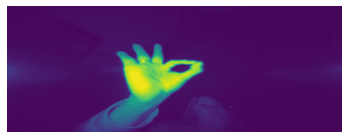

The predicted hand gesture is: ok


In [20]:
import numpy as np
from tensorflow.keras.preprocessing import image
from skimage.io import imread
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('hand_gesture_model.h5')

# Define the image size and the gesture names
IMAGE_SIZE = (128, 128)
gesture_names = [
    'palm', 'l','ok', 'fist', 'fist_moved', 'thumb', 'index', 
    'palm_moved', 'c', 'down'
]

def predict_hand_gesture(image_path):
    img = image.load_img(image_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    predicted_gesture = gesture_names[predicted_class]

    return predicted_gesture

# Image path to predict
image_path_to_predict = '/Users/aishwarya/Jain University/Masters/Prodigy InfoTech/PRODIGY_ML_04/leapgestrecog/leapGestRecog/02/07_ok/frame_02_07_0009.png'
predicted_gesture = predict_hand_gesture(image_path_to_predict)

# Display the image
img = imread(image_path_to_predict)
plt.imshow(img)
plt.axis('off')
plt.show()

# Print the predicted gesture
print(f"The predicted hand gesture is: {predicted_gesture}")
